## **Name: Shruti Patil**

## **Roll No: 22102B2005**

## **BE CMPN B**

## **GitHub Link: https://github.com/shruti10951/Machine-Learning**

## **Problem Statement 1**

Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Read Dataset

In [17]:
housing_dataset = pd.read_csv("/content/housing.csv")
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Handling Null Values

In [19]:
housing_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
# drop rows that contain missing values
# new_dataset = housing_dataset.dropna()

# replace missing values with mean
columns_with_missing_values = housing_dataset.columns[housing_dataset.isnull().any()]
housing_dataset.fillna(housing_dataset[columns_with_missing_values].mean(), inplace= True)

In [21]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Converting Categorical Data into Numeric Data

In [22]:
label_encoder = preprocessing.LabelEncoder()
housing_dataset['ocean_proximity'] = label_encoder.fit_transform(housing_dataset['ocean_proximity'])
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


Exploratory Data Analysis

In [23]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

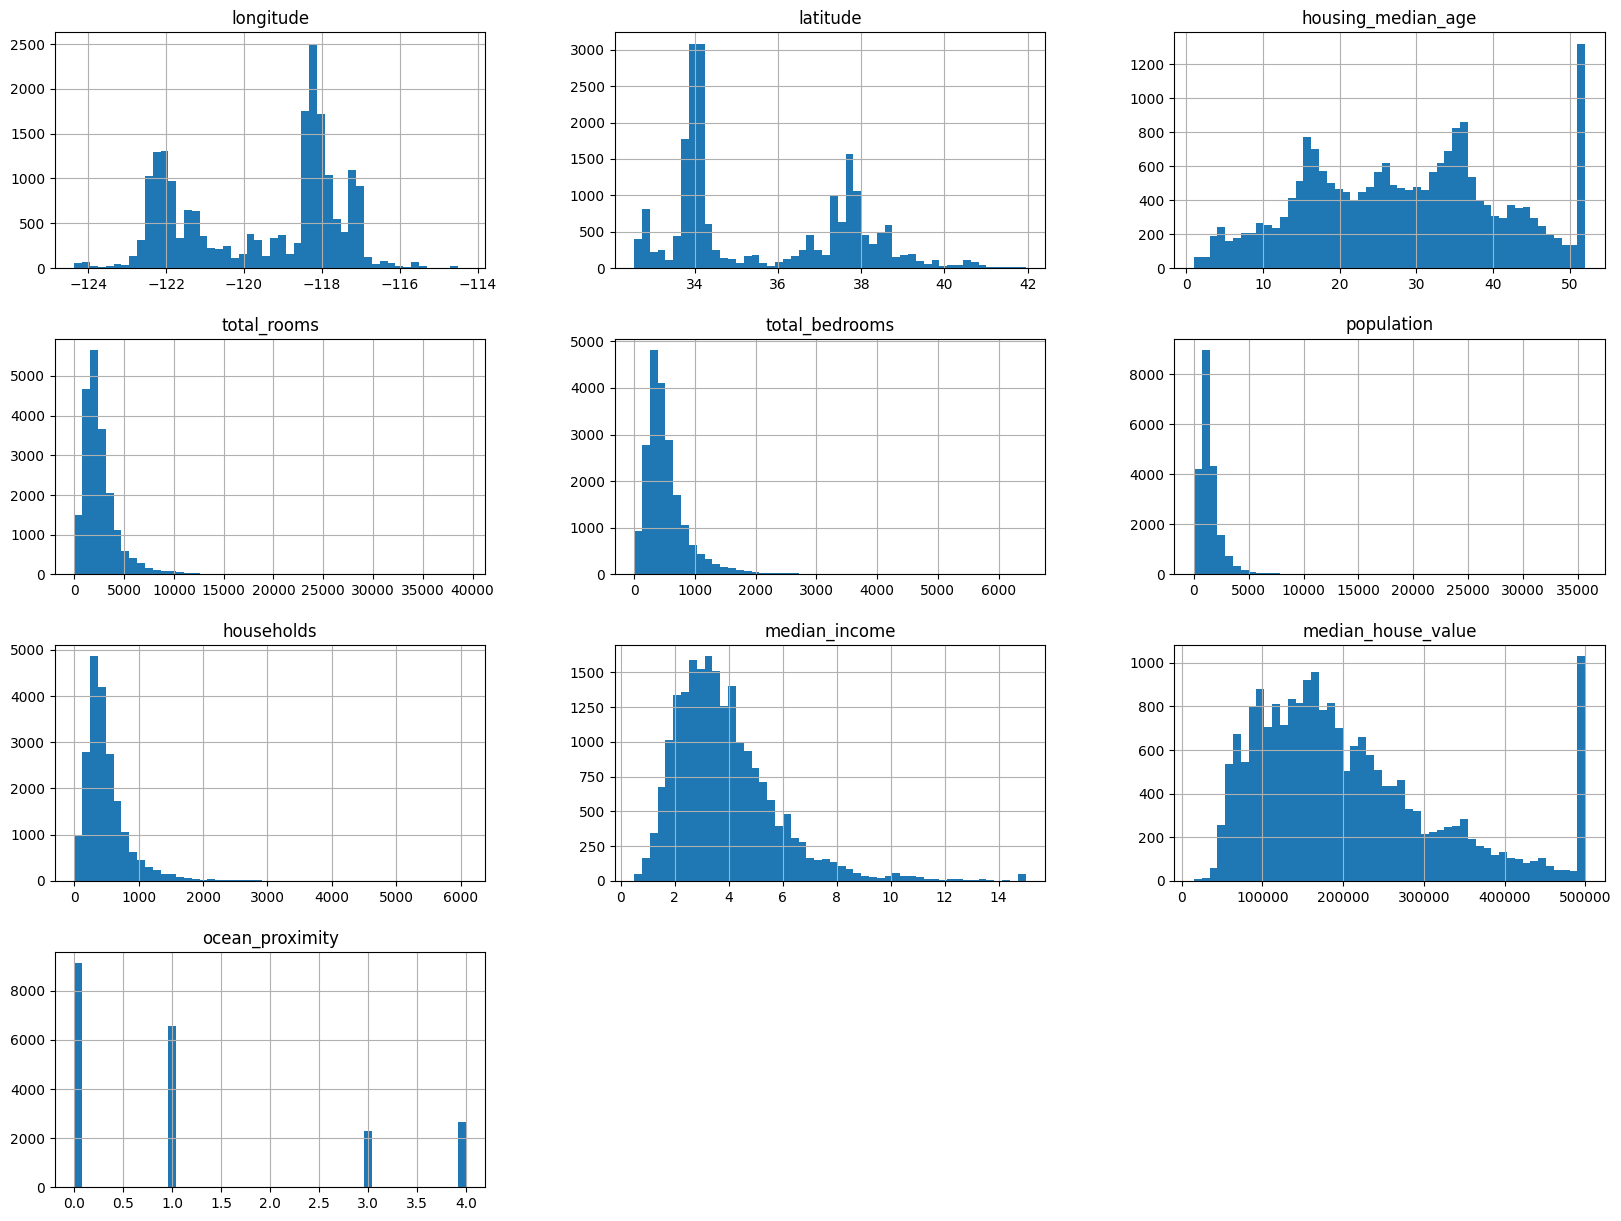

In [24]:
housing_dataset.hist(bins=50, figsize=(20,15))

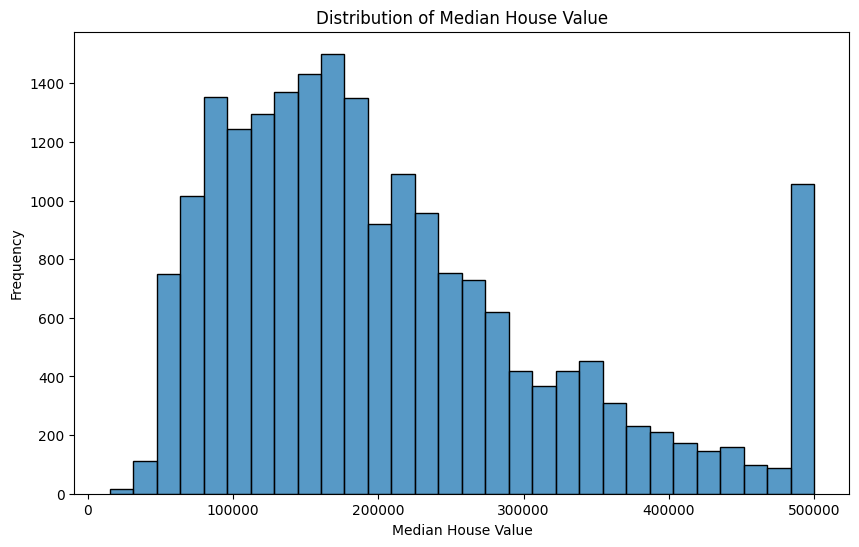

In [25]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(housing_dataset['median_house_value'], bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

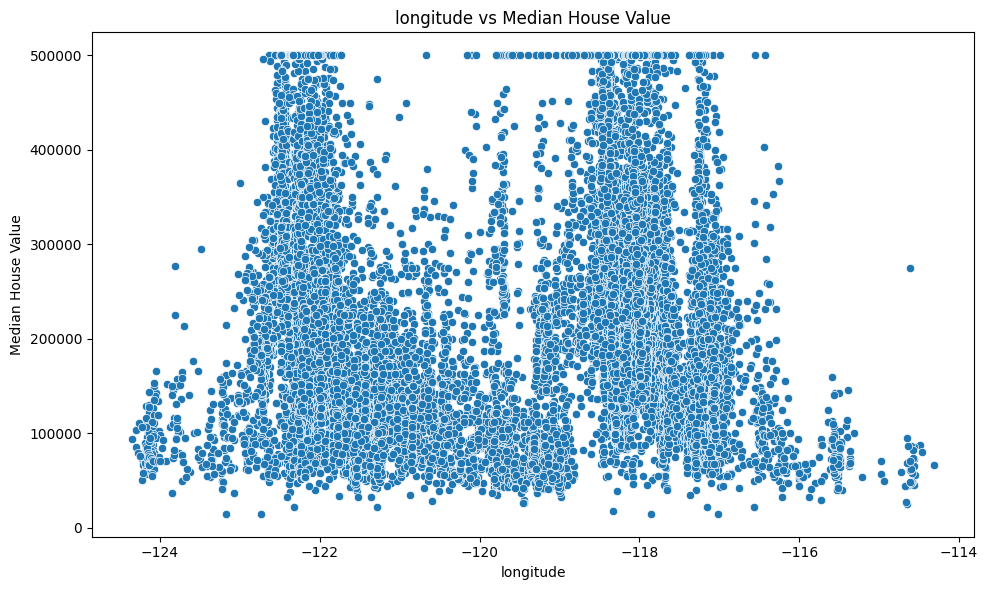

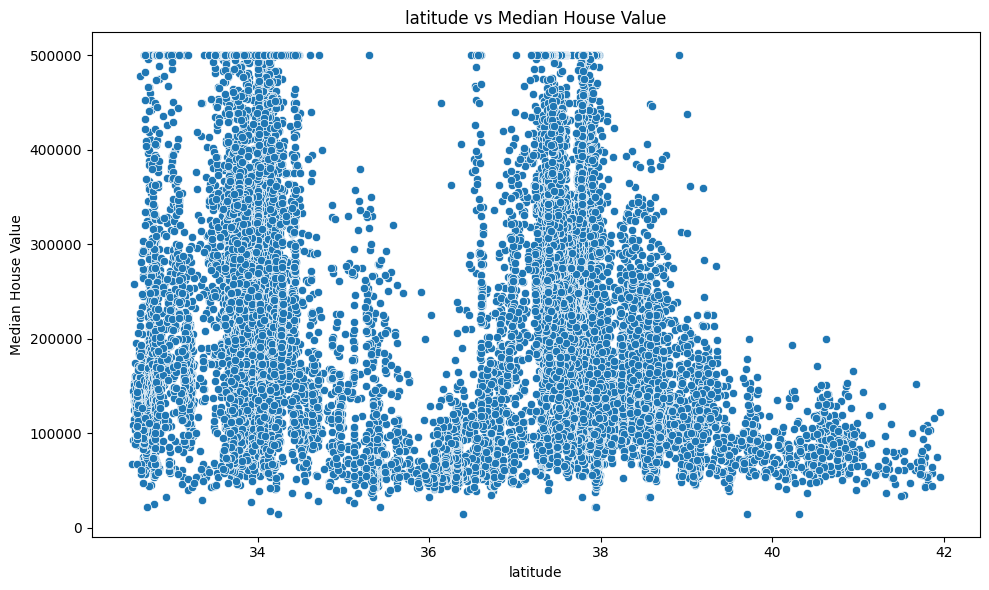

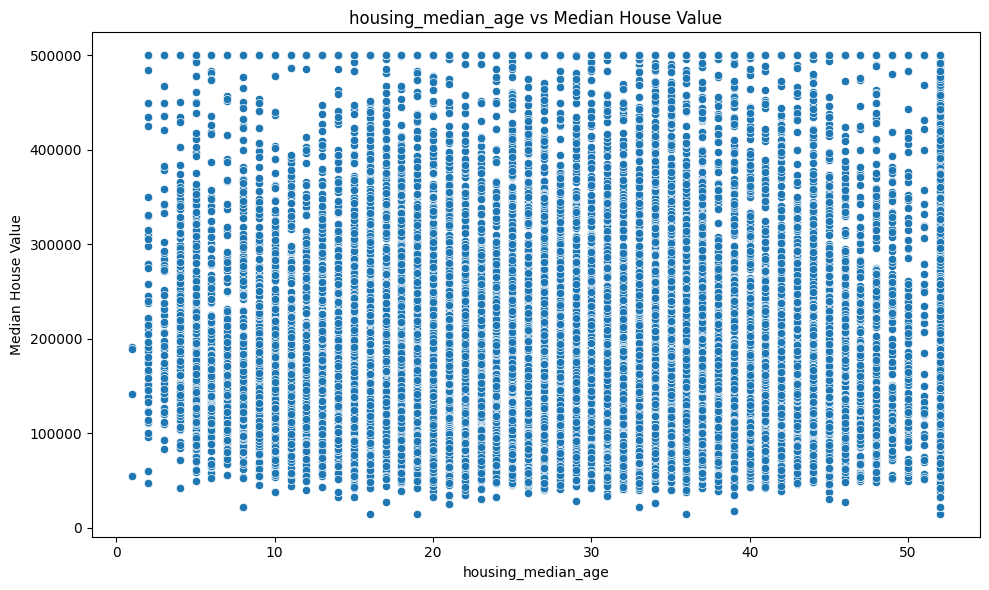

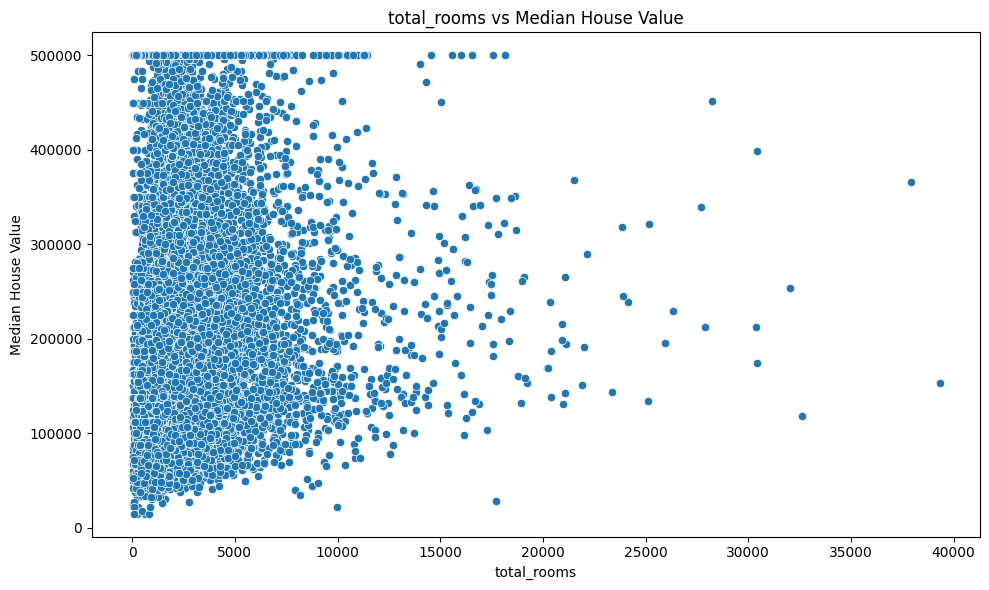

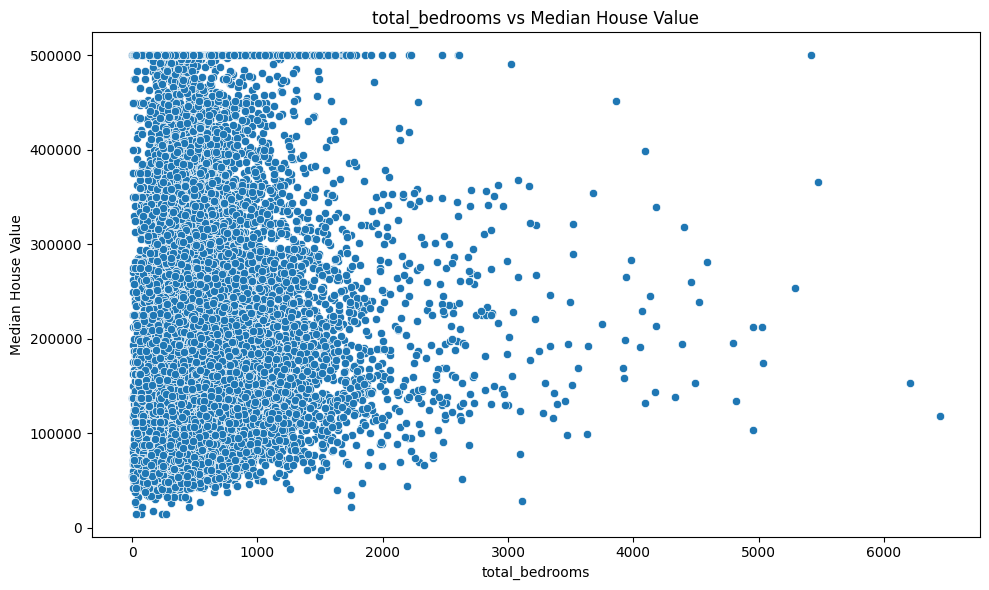

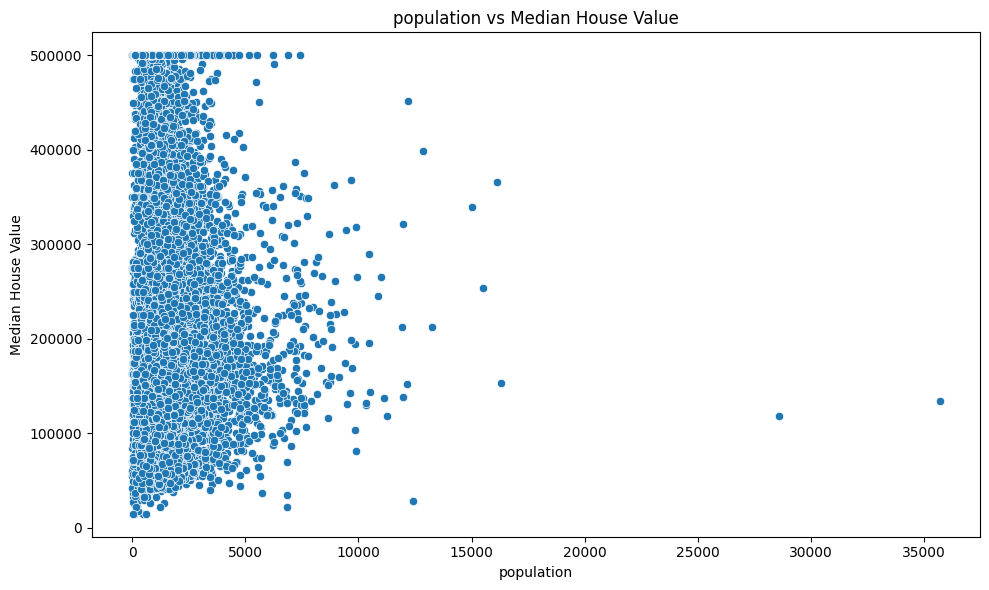

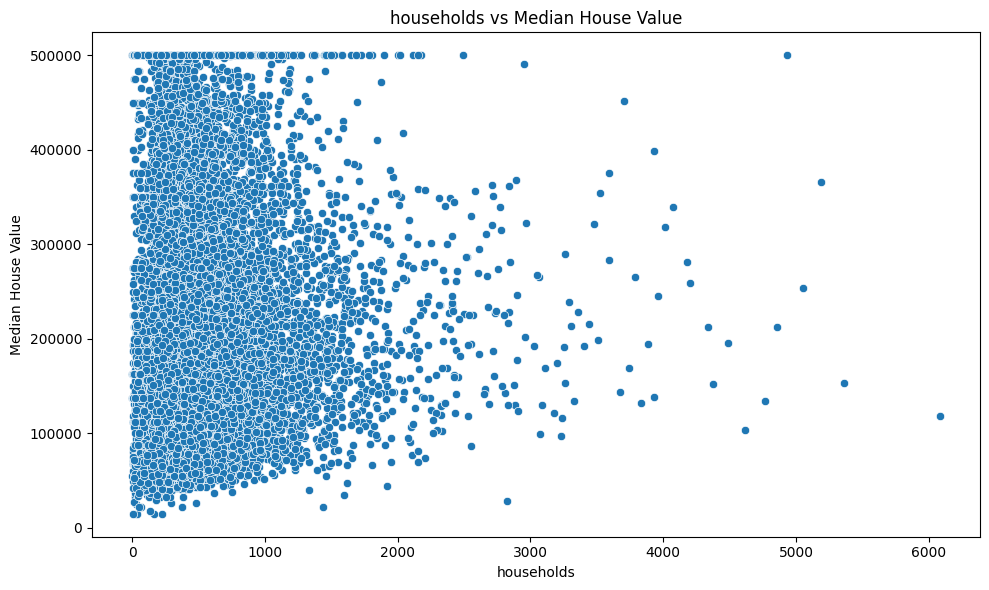

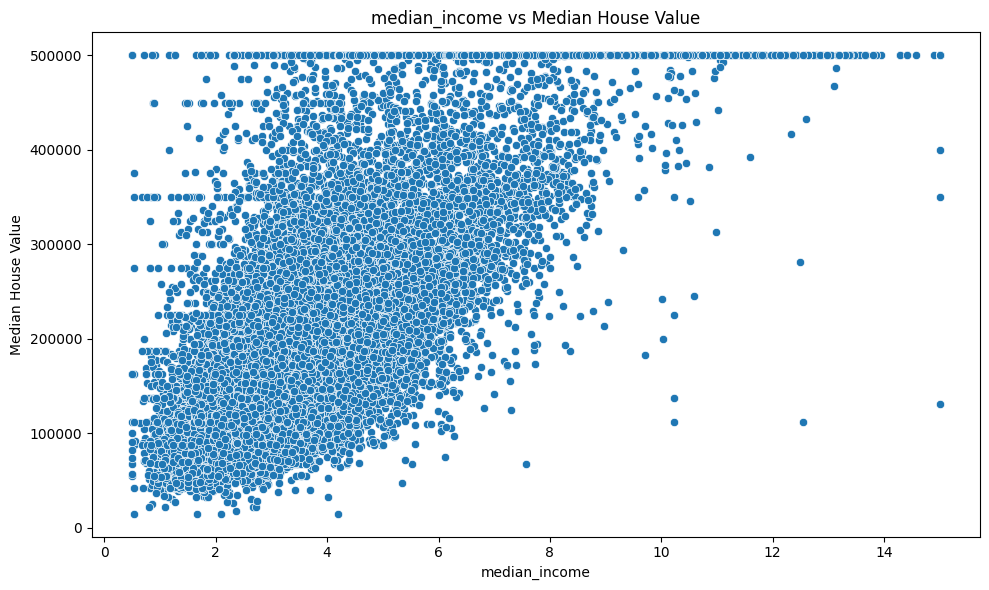

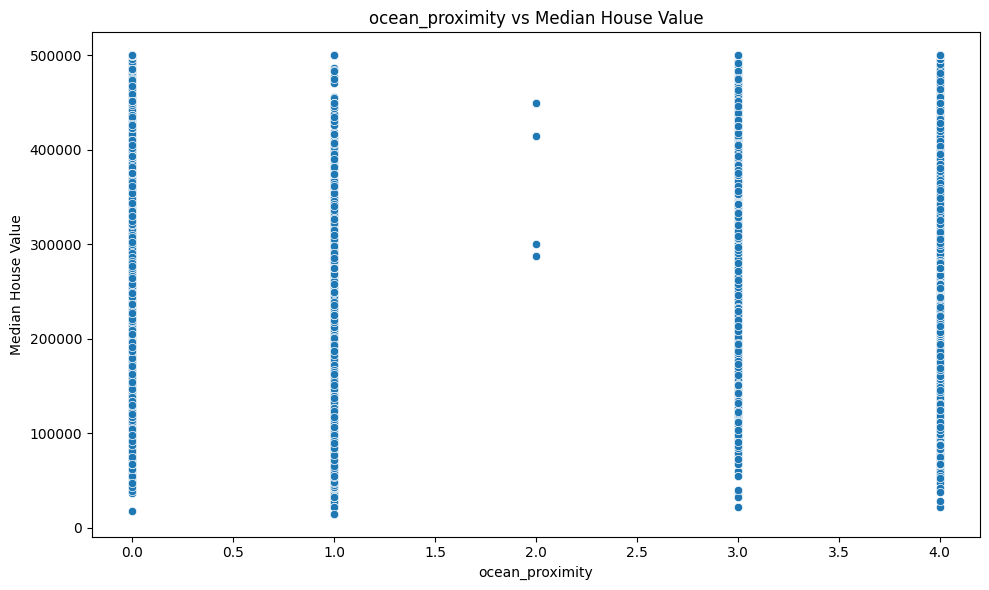

In [26]:
for i in housing_dataset.columns:
  if i == 'median_house_value':
    continue
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=i, y='median_house_value', data=housing_dataset)
  plt.title(f'{i} vs Median House Value')
  plt.xlabel(f'{i}')
  plt.ylabel('Median House Value')
  plt.tight_layout()
  plt.show()

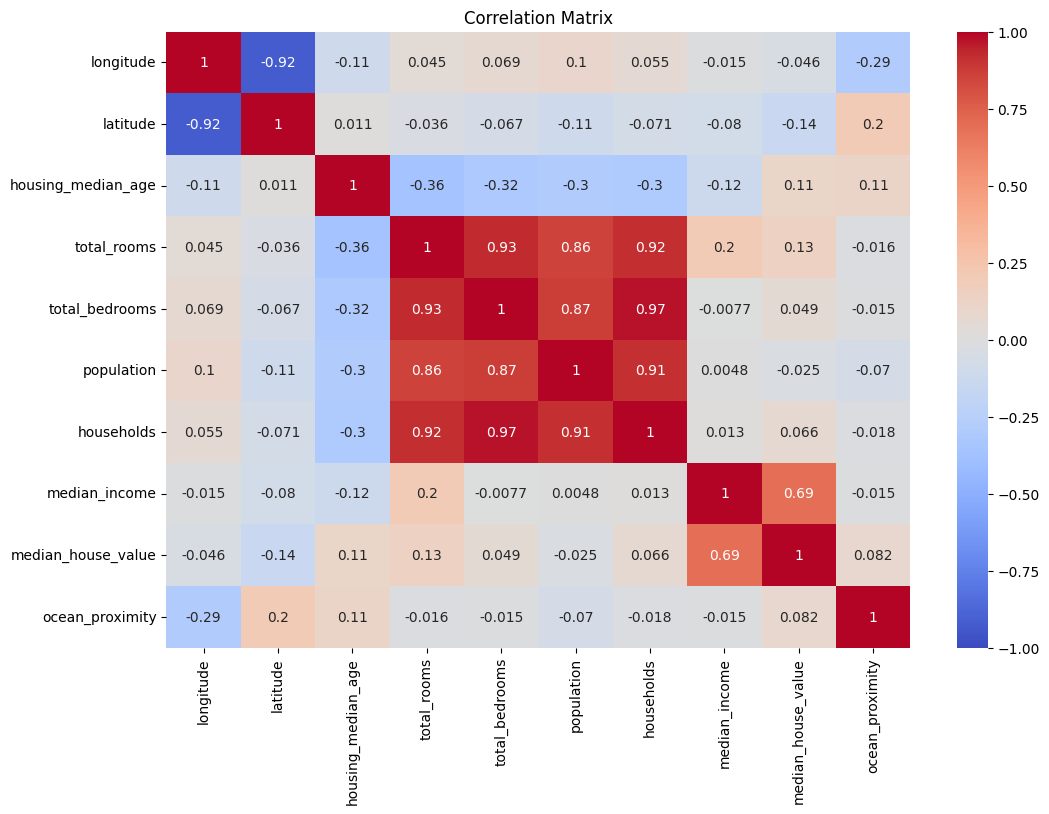

In [27]:
# Calculate the correlation matrix
correlation_matrix = housing_dataset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

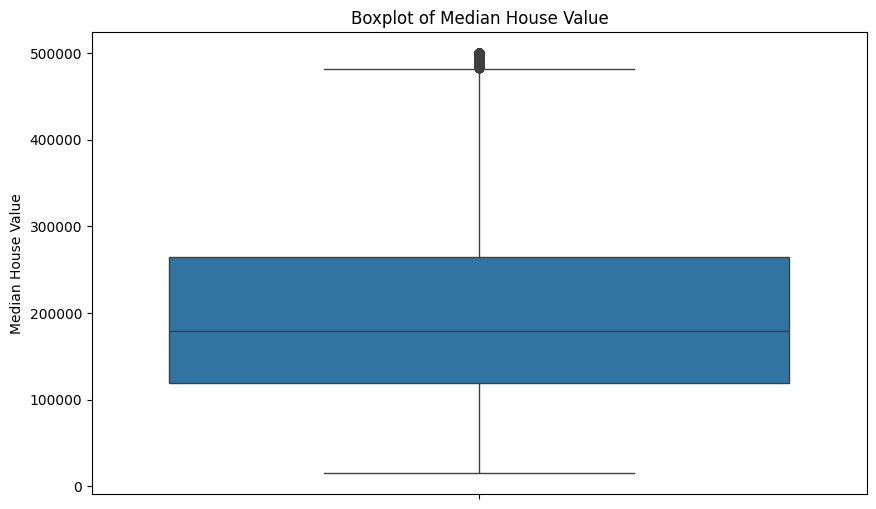

In [28]:
# Boxplot to visualize outliers in median_house_value
plt.figure(figsize=(10, 6))
sns.boxplot(y=housing_dataset['median_house_value'])
plt.title('Boxplot of Median House Value')
plt.ylabel('Median House Value')
plt.show()

SPLITTING THE DATA INTO TRAIN AND TEST

In [29]:
#target variable initalization
target = housing_dataset['median_house_value']
target.head()

#feature initialization
features = housing_dataset.drop(['median_house_value'], axis=1)
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 2)

In [34]:
print(features.shape, X_train.shape, X_test.shape)
print(target.shape, Y_train.shape, Y_test.shape)

(20640, 9) (16512, 9) (4128, 9)
(20640,) (16512,) (4128,)


In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, Y_train)

LinearRegression()

In [37]:
# prediction on Test Data
test_prediction = model.predict(X_test)
# prediction on Train data
training_prediction = model.predict(X_train)

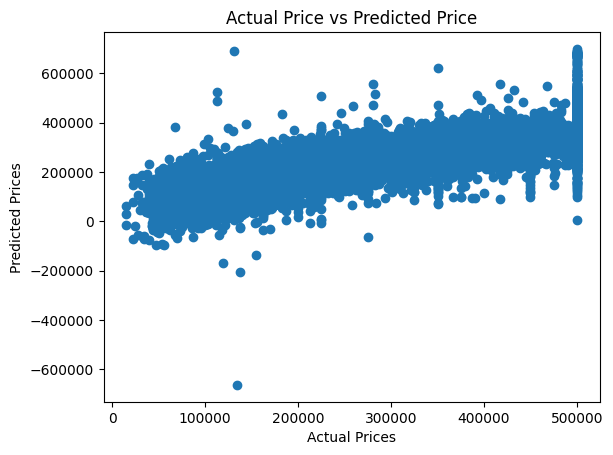

In [38]:
plt.scatter(Y_train, training_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Evaluating the Model

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
print("MAE: ",mean_absolute_error(Y_test,test_prediction))
print("MSE: ",mean_squared_error(Y_test,test_prediction))
r2 = r2_score(Y_test,test_prediction)
print("R2 : ",r2)

MAE:  51553.23609857847
MSE:  4975477925.354508
R2 :  0.6306319351664211


Cross Validation

In [41]:
train_score =model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

print('Linear regression score: \n')
print('Train score : ',round(train_score*100),'%')
print('Test score : ',round(test_score*100),'%')

Linear regression score: 

Train score :  64 %
Test score :  63 %
